In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys


In [2]:
# Allow imports from parent directory 
# https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im/35273613#35273613
#module_path = os.path.abspath(os.path.join(os.pardir))
module_path = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\programs\\'
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path

['',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\python36.zip',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\DLLs',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\Sphinx-1.5.1-py3.6.egg',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.6.egg',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\agomez\\.ipython',
 'C:\\Users\\agomez\\Dropbox\\Harv

In [3]:
import time
import datetime

import pandas as pd
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

import seaborn as sns

import itertools
import collections
import warnings
import IPython.display
import scipy.stats
import networkx as nx
from operator import itemgetter

plt.style.use('seaborn-white')
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=9)


from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, PolynomialFeatures
from sklearn.decomposition import PCA, NMF
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from numpy.random import exponential, negative_binomial, randint, choice, binomial
from random import shuffle

import statsmodels.formula.api as smf


In [4]:
import EComm_0001_complexities 

In [5]:
# Number of countries and products
Nc = 300
Np = 2000


# Generating the names

In [8]:
# Generating Cca and Ppa with the configuration model
# Two sets of countries

# Number of countries for set 1 and 2
Nc1 = np.int(np.floor(Nc/2.0))
Nc2 = np.int(np.ceil(Nc/2.0))
#print(Nc1+Nc2==Nc)

# Names of countries
names1 = np.array(["A" + str(i).zfill(np.int(np.ceil(np.log10(Nc+1)))) for i in np.arange(1, Nc1+1)])
names2 = np.array(["B" + str(i).zfill(np.int(np.ceil(np.log10(Nc+1)))) for i in np.arange(1, Nc2+1)])
allcty_names = np.concatenate((names1, names2))
#print(names1, names2, allcty_names)

# The distribution of complexities (i.e., number of capabilities per country) will be exponential
cty_compl1 = sorted(np.ceil(exponential(scale=100.0, size=Nc1)), reverse=True)
#print(cty_compl1)
cty_compl2 = sorted(np.ceil(exponential(scale=100.0, size=Nc2)), reverse=True)
#print(cty_compl2)



In [9]:
# Generating Cca and Ppa with the configuration model
# Names of products
prod_names = np.array(["P" + str(i).zfill(np.int(np.ceil(np.log10(Np+1)))) for i in np.arange(1, Np+1)])

Np1 = np.int(np.floor(Np/2.0))
Np2 = np.int(np.ceil(Np/2.0))
prod_names1 = np.array(prod_names[:Np1])
prod_names2 = np.array(prod_names[Np1:Np])
#print(prod_names1, prod_names2, prod_names)

# The distribution of product complexities (i.e., number of capabilities required per product) will be binomial
prod_compl1 = sorted(np.array(1.0 + binomial(p=2.0/max(cty_compl1), n=np.int(np.ceil(max(cty_compl1))), size=Np1)), reverse=True)
#print(prod_compl1)
prod_compl2 = sorted(np.array(1.0 + binomial(p=2.0/max(cty_compl2), n=np.int(np.ceil(max(cty_compl2))), size=Np2)), reverse=True)
#print(prod_compl2)


In [10]:
# Number of capabilities for set 1 and 2
numcapabilities1 = np.int(max(cty_compl1)+1)
numcapabilities2 = np.int(max(cty_compl2)+1)
Na = numcapabilities1 + numcapabilities2
print("{} total capabilities.".format(numcapabilities1+numcapabilities2))

# Names of capabilities
cap_names1 = np.array(["x" + str(i).zfill(np.int(np.ceil(np.log10(Na+1)))) for i in np.arange(1, numcapabilities1+1)])
cap_names2 = np.array(["y" + str(i).zfill(np.int(np.ceil(np.log10(Na+1)))) for i in np.arange(1, numcapabilities2+1)])
allcap_names = np.concatenate((cap_names1, cap_names2))
#print(allcap_names)

1116 total capabilities.


# Generate Cca

### Generality/specificity of capabilities

In [11]:
# Each capability has a different likelihood of being used. Some are rare to find, others are very common.
# This value per capability will serve as a weight to sample it.
weight_cap_gen1 = 1.0+exponential(scale=10.0, size=numcapabilities1)**2
weight_cap_gen1 = sorted(weight_cap_gen1/weight_cap_gen1.sum(), reverse=True)
weight_cap_gen2 = 1.0+exponential(scale=10.0, size=numcapabilities2)**2
weight_cap_gen2 = sorted(weight_cap_gen2/weight_cap_gen2.sum(), reverse=True)

#list(map(lambda x: np.around(x, decimals=3), [weight_cap_gen1, weight_cap_gen2]))

In [12]:

# Creating the list of capabilities that each country has. Each country will thus be represented
# as a tuple of capabilities.
cty_endowments1 = {names1[country]: tuple(choice(cap_names1, 
                                         size = np.int(cty_compl1[country]), 
                                         replace = False,
                                         p = weight_cap_gen1)) for country in range(0,Nc1)  }
cty_endowments2 = {names2[country]: tuple(choice(cap_names2, 
                                         size = np.int(cty_compl2[country]), 
                                         replace = False,
                                         p = weight_cap_gen2)) for country in range(0,Nc2)  }

# Creating the edge list
ctycap_edgelist1 = np.array([[country, capability] for country in names1 for capability in cty_endowments1[country]])
ctycap_edgelist2 = np.array([[country, capability] for country in names2 for capability in cty_endowments2[country]])

print((ctycap_edgelist1.shape, ctycap_edgelist2.shape))
ctycap_edgelist1

((17081, 2), (15704, 2))


array([['A001', 'x0045'],
       ['A001', 'x0387'],
       ['A001', 'x0001'],
       ..., 
       ['A149', 'x0011'],
       ['A149', 'x0173'],
       ['A150', 'x0051']],
      dtype='<U5')

### Creating off-diagonal elements

In [13]:
# Creating off-diagonal elements
allnewcap_names = np.sort(np.unique(np.concatenate((ctycap_edgelist1[:,1], ctycap_edgelist2[:,1]))))
newNa = len(allnewcap_names)
print(newNa)

1115


In [14]:
ncross = np.int(0.1*Nc*newNa)
cty_subsampl = np.array(choice(allcty_names, size=ncross))
cap_subsampl = np.array(choice(allnewcap_names, size=ncross))
offdiag_edgelist = np.array([[cty_subsampl[i], cap_subsampl[i]] for i in range(0, ncross)])
offdiag_edgelist.shape

(33450, 2)

## Concatenating

In [15]:
bipartite_long = np.concatenate((ctycap_edgelist1, ctycap_edgelist2, offdiag_edgelist), axis=0)
print(bipartite_long.shape)
bipartite_long = np.unique(bipartite_long, axis=0)
print(bipartite_long.shape)

bipartite_longdfall = pd.DataFrame(bipartite_long, columns=['country_code', 'capability_code'])
bipartite_longdfall['Edge'] = 1

(66235, 2)
(61645, 2)


In [16]:
Cca_df_wide = bipartite_longdfall.pivot(index='country_code', columns='capability_code', values='Edge').fillna(0.0)
Cca_df_wide

capability_code,x0001,x0002,x0003,x0004,x0005,x0006,x0007,x0008,x0009,x0010,...,y0553,y0554,y0555,y0556,y0557,y0558,y0559,y0560,y0561,y0562
country_code,,,,,,,,,,,,,,,,,,,,,
A001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A002,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A003,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
A004,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
A005,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A006,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A007,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A008,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
A009,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


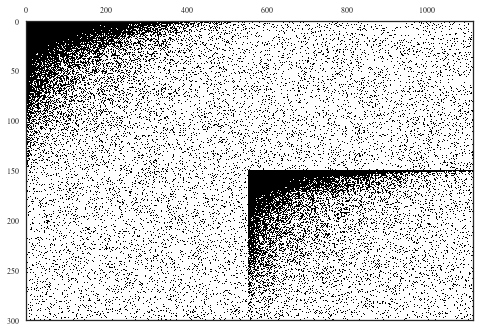

In [17]:
plt.spy(Cca_df_wide,aspect='auto')
plt.show()

In [18]:
cty_complexities = Cca_df_wide.sum(axis=1)
cty_complexities.head()

country_code
A001    605.0
A002    516.0
A003    482.0
A004    468.0
A005    437.0
dtype: float64

In [19]:
cap_ubiquities = Cca_df_wide.sum(axis=0)


In [18]:
cap_ubiquities1 = pd.DataFrame([[cap_ubiquities.index[i], cap_ubiquities[i]] for i in range(len(cap_ubiquities)) if cap_ubiquities.index[i][0]=="x"], columns=['capability_code','ubiquity'])
cap_ubiquities2 = pd.DataFrame([[cap_ubiquities.index[i], cap_ubiquities[i]] for i in range(len(cap_ubiquities)) if cap_ubiquities.index[i][0]=="y"], columns=['capability_code','ubiquity'])
(cap_ubiquities1, cap_ubiquities2)

(    capability_code  ubiquity
 0              x001     102.0
 1              x002      99.0
 2              x003      92.0
 3              x004      90.0
 4              x005      94.0
 5              x006      93.0
 6              x007      90.0
 7              x008      92.0
 8              x009      87.0
 9              x010      80.0
 10             x011      87.0
 11             x012      94.0
 12             x013      96.0
 13             x014      72.0
 14             x015      87.0
 15             x016      87.0
 16             x017      91.0
 17             x018      89.0
 18             x019      78.0
 19             x020      85.0
 20             x021      81.0
 21             x022      74.0
 22             x023      74.0
 23             x024      79.0
 24             x025      71.0
 25             x026      72.0
 26             x027      73.0
 27             x028      72.0
 28             x029      78.0
 29             x030      68.0
 ..              ...       ...
 288    

In [19]:
maximumcomplexity = np.max(cty_complexities)
maximumcomplexity

456.0

# Generate Ppa

In [20]:
prod_requirements1 = {prod_names1[product]: tuple(choice(cap_names1,
                                                        size = np.int(prod_compl1[product]), 
                                                        replace = False, 
                                                        p = weight_cap_gen1)) 
                                                        for product in range(0,Np1) }
prod_requirements2 = {prod_names2[product]: tuple(choice(cap_names2,
                                                        size = np.int(prod_compl2[product]), 
                                                        replace = False, 
                                                        p = weight_cap_gen2)) 
                                                        for product in range(0,Np2) }
# Creating the edge list
prodcap_edgelist1 = np.array([[product, capability] for product in prod_names1 for capability in prod_requirements1[product]])
prodcap_edgelist2 = np.array([[product, capability] for product in prod_names2 for capability in prod_requirements2[product]])

print((prodcap_edgelist1.shape, prodcap_edgelist2.shape))

prodcap_edgelist_all = np.concatenate((prodcap_edgelist1, prodcap_edgelist2), axis=0)

((3040, 2), (3043, 2))


In [21]:
prodcap_edgelist1

array([['P0001', 'x0088'],
       ['P0001', 'x0130'],
       ['P0001', 'x0023'],
       ..., 
       ['P0998', 'x0100'],
       ['P0999', 'x0495'],
       ['P1000', 'x0194']],
      dtype='<U5')

In [22]:
prodcap_edgelist2

array([['P1001', 'y0007'],
       ['P1001', 'y0060'],
       ['P1001', 'y0178'],
       ..., 
       ['P1998', 'y0001'],
       ['P1999', 'y0015'],
       ['P2000', 'y0050']],
      dtype='<U5')

In [23]:
Ppa_df = pd.DataFrame(prodcap_edgelist_all, columns=['product_code', 'capability_code'])
Ppa_df['Edge']=1.0

In [24]:
Ppa_df.head()

,product_code,capability_code,Edge
0,P0001,x0088,1.0
1,P0001,x0130,1.0
2,P0001,x0023,1.0
3,P0001,x0031,1.0
4,P0001,x0022,1.0


In [25]:
Ppa_df = Ppa_df.pivot(index='product_code', columns='capability_code', values='Edge').fillna(0.0)

In [26]:
Ppa_df_wide = Ppa_df.reindex(columns = Cca_df_wide.columns.values, fill_value=0.0)

In [27]:
Ppa_df_wide

capability_code,x0001,x0002,x0003,x0004,x0005,x0006,x0007,x0008,x0009,x0010,...,y0553,y0554,y0555,y0556,y0557,y0558,y0559,y0560,y0561,y0562
product_code,,,,,,,,,,,,,,,,,,,,,
P0001,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P0002,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P0003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P0004,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P0005,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P0006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P0007,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P0008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P0009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


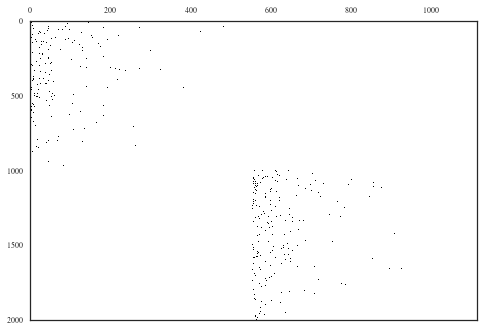

In [28]:
plt.spy(Ppa_df_wide,aspect='auto')
plt.show()

In [29]:
sorted(Ppa_df_wide.sum(axis=1), reverse=True)

[10.0,
 9.0,
 8.0,
 8.0,
 8.0,
 8.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.

# Getting all info together

In [30]:
(Cca_df_wide.shape, Ppa_df_wide.shape)

((300, 1115), (2000, 1115))

In [31]:
Mcp_raw = EComm_0001_complexities.ProductionMatrix(np.array(Cca_df_wide), np.array(Ppa_df_wide).T, 1)

In [33]:
Mcp_raw_df = pd.DataFrame(Mcp_raw, index=Cca_df_wide.index.values, columns=Ppa_df_wide.index.values)
Mcp_raw_df

,P0001,P0002,P0003,P0004,P0005,P0006,P0007,P0008,P0009,P0010,...,P1991,P1992,P1993,P1994,P1995,P1996,P1997,P1998,P1999,P2000
A001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
A002,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
A003,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
A004,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
A005,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A006,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A007,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A008,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
A009,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
A010,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
Mcp_raw_df.shape

(300, 2000)

### Need to remove products that are not produced by anyone

In [40]:
Mcp_df = Mcp_raw_df.loc[:, (Mcp_raw_df != 0).any(axis=0)]
Mcp = np.array(Mcp_df)

In [41]:
Mcp_df.shape

(300, 2000)

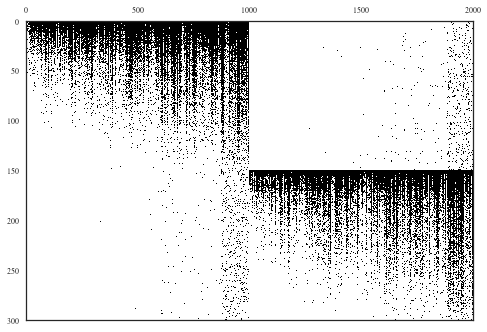

In [42]:
plt.spy(Mcp_raw, aspect='auto')
plt.show()

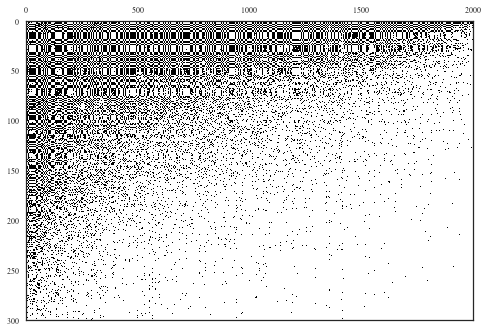

In [43]:
nmat, ncP, npP = EComm_0001_complexities.ReorderingMatrix(Mcp)
plt.spy(nmat, aspect='auto')
plt.show()

# Calculating complexities

In [46]:
ecis = EComm_0001_complexities.ECIcalculate(Mcp)
fitness = EComm_0001_complexities.FITNESScalculate(Mcp, numiter=1000)
eciplus = EComm_0001_complexities.ECIPLUScalculate(Mcp, numiter=1000, meanmethod='arithmetic')
realcomplexities = Cca_df_wide.sum(axis=1)
diversities = Mcp_df.sum(axis=1)

In [47]:
cty_array = np.array([[realcomplexities[c], diversities[c], ecis[c], fitness[c], eciplus[c]] for c in range(Nc)])
cty_df = pd.DataFrame(cty_array, index=allcty_names, columns=['num_capabilities', 'num_products', 'eci', 'fitness', 'eciplus'])
#cty_df['country_code'] = allcty_names 
cty_df['log_cap'] = np.log10(cty_df.num_capabilities.values) 
cty_df['log_div'] = np.log10(cty_df.num_products.values) 
cty_df['type'] = [cname[0] for cname in allcty_names]

In [48]:
cty_df.index.name = 'country_code'

In [49]:
cty_df.head()

,num_capabilities,num_products,eci,fitness,eciplus,log_cap,log_div,type
country_code,,,,,,,,
A001,605.0,1024.0,1.241937,7.192683,7.192683,2.781755,3.010300,A
A002,516.0,1008.0,1.254518,6.613998,6.613998,2.712650,3.003461,A
A003,482.0,996.0,1.270083,6.731325,6.731325,2.683047,2.998259,A
A004,468.0,969.0,1.278127,5.963980,5.963980,2.670246,2.986324,A
A005,437.0,963.0,1.263505,5.781169,5.781169,2.640481,2.983626,A


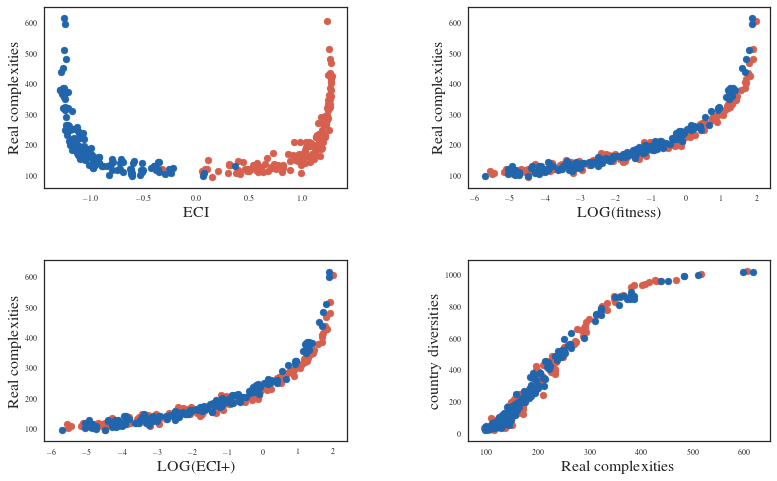

In [53]:
fig = plt.figure(figsize=(13,8))
#ax1, ax2, ax3, ax4 = axes.flatten()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax1.scatter(ecis[:Nc1], realcomplexities[:Nc1], c='#d6604d')
ax1.scatter(ecis[Nc1:Nc], realcomplexities[Nc1:Nc], c='#2166ac')
ax1.set_xlabel('ECI', fontsize=16)
ax1.set_ylabel('Real complexities', fontsize=16)

ax2.scatter(np.log(fitness)[:Nc1], realcomplexities[:Nc1], c='#d6604d') # orange type A
ax2.scatter(np.log(fitness)[Nc1:Nc], realcomplexities[Nc1:Nc], c='#2166ac')  # blue type B
ax2.set_xlabel('LOG(fitness)', fontsize=16)
ax2.set_ylabel('Real complexities', fontsize=16)

ax3.scatter(np.log(eciplus)[:Nc1], realcomplexities[:Nc1], c='#d6604d')
ax3.scatter(np.log(eciplus)[Nc1:Nc], realcomplexities[Nc1:Nc], c='#2166ac')
ax3.set_xlabel('LOG(ECI+)', fontsize=16)
ax3.set_ylabel('Real complexities', fontsize=16)

ax4.scatter(realcomplexities[:Nc1], diversities[:Nc1], c='#d6604d')
ax4.scatter(realcomplexities[Nc1:Nc],  diversities[Nc1:Nc], c='#2166ac')
ax4.set_xlabel('Real complexities', fontsize=16)
ax4.set_ylabel('country diversities', fontsize=16)

plt.show()

In [54]:
mod = smf.ols(formula='log_div ~ log_cap', data=cty_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                log_div   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     2271.
Date:                Fri, 06 Oct 2017   Prob (F-statistic):          1.98e-141
Time:                        17:12:02   Log-Likelihood:                 138.12
No. Observations:                 300   AIC:                            -272.2
Df Residuals:                     298   BIC:                            -264.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0283      0.113    -26.906      0.0

In [55]:
(np.log10(Nc), 10**1.5813)

(2.4771212547196626, 38.132914527677734)

In [56]:
Mcp_df['country_code'] = Mcp_df.index.values
Mcp_longdf = pd.wide_to_long(Mcp_df, stubnames='P', i='country_code', j='product_code')

In [57]:
save2file = False
if(save2file):
    # name of file
    folder = "~\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\programs\\"
    finalfilename = "EComm_0004_syntheticMcp_C{C}_P{P}.csv".format(C=Nc, P=Np)

    # To csv file
    Mcp_longdf.reset_index(level=['country_code', 'product_code']).to_csv(folder + finalfilename, index=False, encoding='utf-8')

# GOING TO R AND FITTING AN flem FIXED EFFECTS MODEL

In [73]:
# name of file
folder = "~\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\programs\\"
inputfilename = "EComm_0005_factors_estimated_C{C}_P{P}.csv".format(C=Nc, P=Np)

estfactors = pd.read_csv(folder + inputfilename)

In [74]:
estfactors.head()

,effect,obs,comp,fe,idx
0,0.0000,800,1,country_code,A001
1,0.6200,800,1,country_code,A002
2,0.6325,800,1,country_code,A003
3,0.7425,800,1,country_code,A004
4,0.7475,800,1,country_code,A005


In [111]:
cty_factors = estfactors.loc[estfactors['fe']=='country_code'][['effect','idx']]
cty_factors['rc'] = 1.0 - np.exp(cty_factors['effect'].values)/(1.0-min(1.0 - np.exp(cty_factors['effect'].values)))
cty_factors

,effect,idx,rc
0,0.0000,A001,0.622808
1,0.6200,A002,0.298827
2,0.6325,A003,0.290007
3,0.7425,A004,0.207450
4,0.7475,A005,0.203478
5,0.7650,A006,0.189416
6,0.7700,A007,0.185353
7,0.7950,A008,0.164730
8,0.7850,A009,0.173041
9,0.8525,A010,0.115294


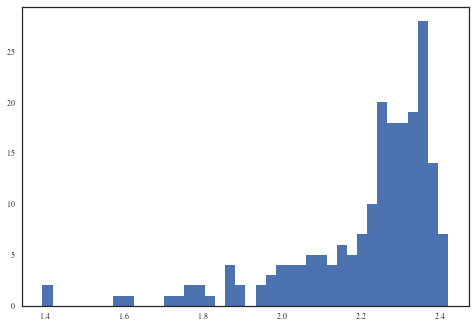

In [92]:
plt.hist(np.exp(np.exp(cty_factors['effect'])/3.0), bins=40)
plt.show()

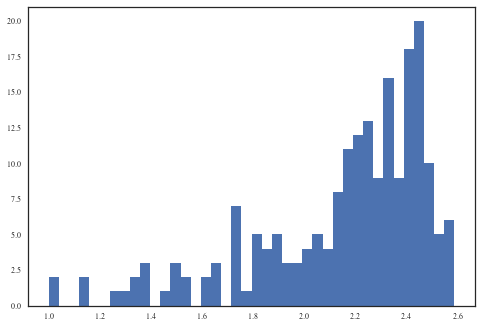

In [97]:
plt.hist(np.exp(cty_factors['effect']**2), bins=40)
plt.show()

In [112]:
(min(cty_factors['rc'].values), max(cty_factors['rc'].values))

(0.0, 0.62562600702530713)

In [120]:
cty_df['rc'] = cty_factors['rc'].values
cty_df

,num_capabilities,num_products,eci,fitness,eciplus,log_cap,log_div,type,rc
country_code,,,,,,,,,
A001,420.0,412.0,-2.583189,2.000000e+02,2.000000e+02,2.623249,2.614897,A,0.622808
A002,275.0,164.0,-1.922128,2.174053e-30,1.185483e-62,2.439333,2.214844,A,0.298827
A003,273.0,159.0,-2.058707,8.271544e-35,1.822064e-71,2.436163,2.201397,A,0.290007
A004,247.0,115.0,-1.683642,5.849867e-55,7.334627e-112,2.392697,2.060698,A,0.207450
A005,240.0,113.0,-1.685777,4.586166e-54,5.720109e-111,2.380211,2.053078,A,0.203478
A006,219.0,106.0,-1.811383,5.849316e-48,1.146880e-97,2.340444,2.025306,A,0.189416
A007,230.0,104.0,-1.572656,9.429111e-47,4.089156e-96,2.361728,2.017033,A,0.185353
A008,212.0,94.0,-1.629322,7.179045e-55,9.011283e-112,2.326336,1.973128,A,0.164730
A009,217.0,98.0,-1.181139,2.286009e-55,2.866619e-112,2.336460,1.991226,A,0.173041


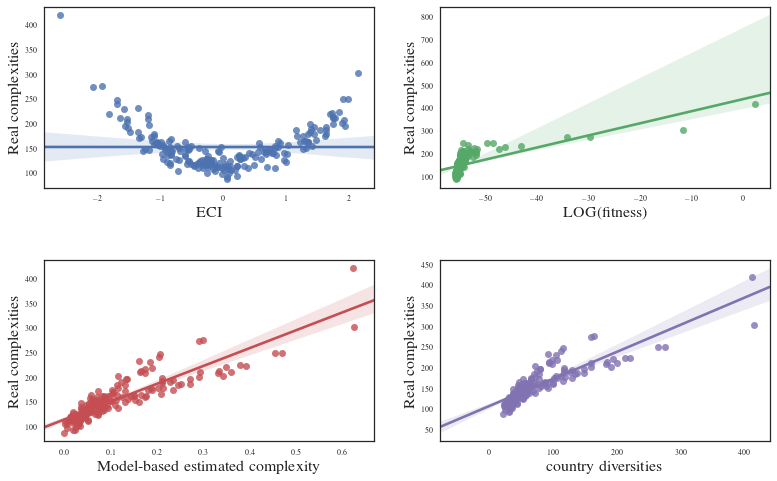

In [118]:
fig = plt.figure(figsize=(13,8))
#ax1, ax2, ax3, ax4 = axes.flatten()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

plt.subplots_adjust(wspace=0.2, hspace=0.4)

sns.regplot(ecis, realcomplexities, ax=ax1)
ax1.set_xlabel('ECI', fontsize=16)
ax1.set_ylabel('Real complexities', fontsize=16)

sns.regplot(np.log10(fitness), realcomplexities, ax=ax2)
ax2.set_xlabel('LOG(fitness)', fontsize=16)
ax2.set_ylabel('Real complexities', fontsize=16)

sns.regplot(cty_factors['rc'].values, realcomplexities, ax=ax3)
ax3.set_xlabel('Model-based estimated complexity', fontsize=16)
ax3.set_ylabel('Real complexities', fontsize=16)

sns.regplot(diversities, realcomplexities, ax=ax4)
ax4.set_xlabel('country diversities', fontsize=16)
ax4.set_ylabel('Real complexities', fontsize=16)

plt.show()

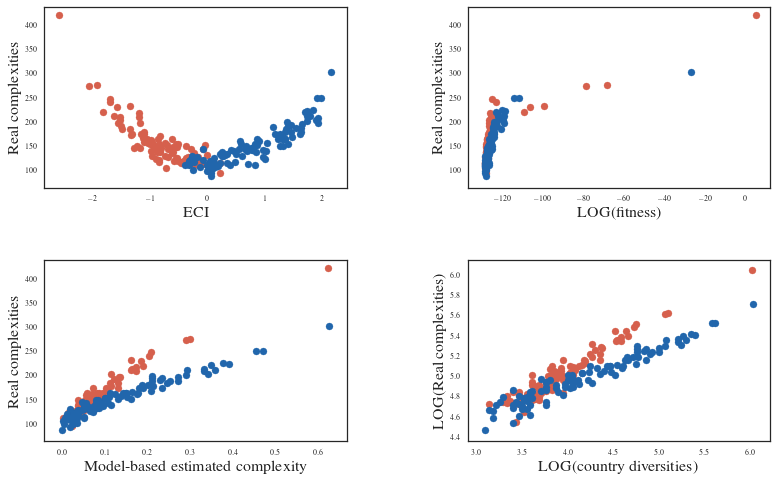

In [114]:
fig = plt.figure(figsize=(13,8))
#ax1, ax2, ax3, ax4 = axes.flatten()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax1.scatter(ecis[:Nc1], realcomplexities[:Nc1], c='#d6604d')
ax1.scatter(ecis[Nc1:Nc], realcomplexities[Nc1:Nc], c='#2166ac')
ax1.set_xlabel('ECI', fontsize=16)
ax1.set_ylabel('Real complexities', fontsize=16)

ax2.scatter(np.log(fitness)[:Nc1], realcomplexities[:Nc1], c='#d6604d') # orange type A
ax2.scatter(np.log(fitness)[Nc1:Nc], realcomplexities[Nc1:Nc], c='#2166ac')  # blue type B
ax2.set_xlabel('LOG(fitness)', fontsize=16)
ax2.set_ylabel('Real complexities', fontsize=16)

#ax3.scatter(np.exp(cty_factors['effect'].values)[:Nc1], realcomplexities[:Nc1], c='#d6604d')
#ax3.scatter(np.exp(cty_factors['effect'].values)[Nc1:Nc], realcomplexities[Nc1:Nc], c='#2166ac')
ax3.scatter(cty_factors['rc'].values[:Nc1], realcomplexities[:Nc1], c='#d6604d')
ax3.scatter(cty_factors['rc'].values[Nc1:Nc], realcomplexities[Nc1:Nc], c='#2166ac')
#ax3.scatter(cty_factors['effect'].values[:Nc1], np.log(Cca_df_wide.shape[1] - realcomplexities[:Nc1]), c='#d6604d')
#ax3.scatter(cty_factors['effect'].values[Nc1:Nc], np.log(Cca_df_wide.shape[1] - realcomplexities[Nc1:Nc]), c='#2166ac')
#ax3.scatter(np.exp(cty_factors['effect'].values**2)[:Nc1], Cca_df_wide.shape[1] - realcomplexities[:Nc1], c='#d6604d')
#ax3.scatter(np.exp(cty_factors['effect'].values**2)[Nc1:Nc], Cca_df_wide.shape[1] - realcomplexities[Nc1:Nc], c='#2166ac')
#ax3.scatter(Cca_df_wide.shape[1] - np.exp(cty_factors['effect'].values)[:Nc1], realcomplexities[:Nc1], c='#d6604d')
#ax3.scatter(Cca_df_wide.shape[1] - np.exp(cty_factors['effect'].values)[Nc1:Nc], realcomplexities[Nc1:Nc], c='#2166ac')
ax3.set_xlabel('Model-based estimated complexity', fontsize=16)
ax3.set_ylabel('Real complexities', fontsize=16)

ax4.scatter(np.log(diversities)[:Nc1], np.log(realcomplexities)[:Nc1], c='#d6604d')
ax4.scatter(np.log(diversities)[Nc1:Nc], np.log(realcomplexities)[Nc1:Nc], c='#2166ac')
ax4.set_xlabel('LOG(country diversities)', fontsize=16)
ax4.set_ylabel('LOG(Real complexities)', fontsize=16)

plt.show()

In [ ]:
mod = smf.ols(formula='log_div ~ log_cap', data=cty_df)
res = mod.fit()
print(res.summary())

In [136]:
xcp = exponential(1.0, size=(3,4))
xcp

array([[ 0.25816459,  0.65182886,  2.86036494,  0.81531292],
       [ 1.91845398,  3.57708569,  0.6939473 ,  0.49215345],
       [ 1.15458098,  0.48713502,  0.25549447,  1.09868079]])

In [137]:
np.floor(xcp)

array([[ 0.,  0.,  2.,  0.],
       [ 1.,  3.,  0.,  0.],
       [ 1.,  0.,  0.,  1.]])